# Set up of AWAKEN neutral case for AMR-Wind

In [1]:
# Load the modules
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the case
case = amrwind.MyApp.init_nogui()

In [3]:
# Set the time constants
case.setAMRWindInput('time.stop_time', 20000.0)
case.setAMRWindInput('time.max_step',  40000)

case.setAMRWindInput('time.fixed_dt',  0.5)
case.setAMRWindInput('time.checkpoint_interval',  4000)

In [4]:
# Set some basic parameters
case.setAMRWindInput('incflo.physics',      ['ABL'])
case.setAMRWindInput('incflo.verbose',      3)
case.setAMRWindInput('io.check_file',       'chk')

case.setAMRWindInput('incflo.use_godunov',  True)
case.setAMRWindInput('incflo.godunov_type', 'weno_z')

case.setAMRWindInput('turbulence.model',    ['OneEqKsgsM84'])
case.setAMRWindInput('TKE.source_terms',    ['KsgsM84Src'])

case.setAMRWindInput('transport.viscosity', 1.642E-5)
case.setAMRWindInput('incflo.density',      1.08923) 

In [5]:
# Set some tolerances
tols = """
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol                       = 1e-12               
mac_proj.mg_rtol                         = 1e-06               
mac_proj.mg_atol                         = 1e-12               
diffusion.mg_rtol                        = 1e-06               
diffusion.mg_atol                        = 1e-12               
temperature_diffusion.mg_rtol            = 1e-10               
temperature_diffusion.mg_atol            = 1e-13               
"""
case.loadAMRWindInput(tols, string=True);

In [6]:
case.setAMRWindInput('geometry.prob_lo', [   0.0,    0.0, 0.0 ])
case.setAMRWindInput('geometry.prob_hi', [4000.0, 4000.0, 960.0])
case.setAMRWindInput('amr.n_cell',       [400,    400,    96])

In [7]:
case.setAMRWindInput('is_periodicx', True)
case.setAMRWindInput('is_periodicy', True)
case.setAMRWindInput('is_periodicz', False)

case.setAMRWindInput('zlo.type',              'wall_model')          
case.setAMRWindInput('zlo.temperature_type',  'wall_model')          
case.setAMRWindInput('zlo.tke_type',          'zero_gradient')       
case.setAMRWindInput('zhi.type',              'slip_wall')           
case.setAMRWindInput('zhi.temperature_type',  'fixed_gradient')      
case.setAMRWindInput('zhi.temperature',       0.003) 

In [8]:
case.setAMRWindInput('ICNS.source_terms',     ['ABLForcing','BoussinesqBuoyancy', 'CoriolisForcing'])

case.setAMRWindInput('ABL.stats_output_frequency',   1)                   
case.setAMRWindInput('ABL.stats_output_format',      'netcdf')

case.setAMRWindInput('incflo.velocity',     [6.931, 0.0, 0.0])
case.setAMRWindInput('ABLForcing.abl_forcing_height',   90)
case.setAMRWindInput('ABL.kappa',                       0.4) 

case.setAMRWindInput('ABL.normal_direction',      2)
case.setAMRWindInput('ABL.surface_roughness_z0',  0.01)
case.setAMRWindInput('ABL.reference_temperature', 307.8)
case.setAMRWindInput('ABL.surface_temp_rate',     0.0)
case.setAMRWindInput('ABL.surface_temp_flux',     0.0)

case.setAMRWindInput('ABL.mo_beta_m',             16.0)
case.setAMRWindInput('ABL.mo_gamma_m',            5.0)
case.setAMRWindInput('ABL.mo_gamma_h',            5.0)
case.setAMRWindInput('ABL.random_gauss_mean',     0.0)
case.setAMRWindInput('ABL.random_gauss_var',      1.0)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


In [9]:
case.setAMRWindInput('CoriolisForcing.latitude',  36.57236455833334)
case.setAMRWindInput('BoussinesqBuoyancy.reference_temperature', 314.4) 

case.setAMRWindInput('ABL.temperature_heights', '0     650.0 750.0 1000.0')
case.setAMRWindInput('ABL.temperature_values',  '307.8 307.8 315.8 316.55')

In [10]:
# This is a case where we don't want to use the defaults in amrwind-frontend
case.setAMRWindInput('ABL.perturb_ref_height', 50.0)
case.setAMRWindInput('ABL.Uperiods', 4.0)
case.setAMRWindInput('ABL.Vperiods', 4.0)
case.setAMRWindInput('ABL.deltaU',   1.0)
case.setAMRWindInput('ABL.deltaV',   1.0)
case.setAMRWindInput('ABL.theta_amplitude',   None)
case.setAMRWindInput('ABL.cutoff_height',   None)
case.setAMRWindInput('ABL.perturb_temperature',   True)
case.setAMRWindInput('ABL.perturb_velocity',      True)

In [11]:
case.setAMRWindInput('time.plot_interval',        2000)

case.setAMRWindInput('incflo.post_processing',    ['sampling'])            
case.setAMRWindInput('sampling.output_frequency', 2000)                 
case.setAMRWindInput('sampling.fields',           ['velocity', 'temperature'])

Cannot set incflo.post_processing
Cannot set sampling.output_frequency
Cannot set sampling.fields


In [12]:
sampleplane = case.get_default_samplingdict()
# Modify the geometry
sampleplane['sampling_name']         = 'p_hub'
sampleplane['sampling_type']         = 'PlaneSampler'
sampleplane['sampling_p_num_points'] = [401, 401]
sampleplane['sampling_p_origin']     = [0, 0, 0]
sampleplane['sampling_p_axis1']      = [4000, 0, 0]
sampleplane['sampling_p_axis2']      = [0, 4000, 0]
sampleplane['sampling_p_normal']     = [0, 0, 1]
sampleplane['sampling_p_offsets']    = '90.0'
case.add_sampling(sampleplane)

## Plot the domain

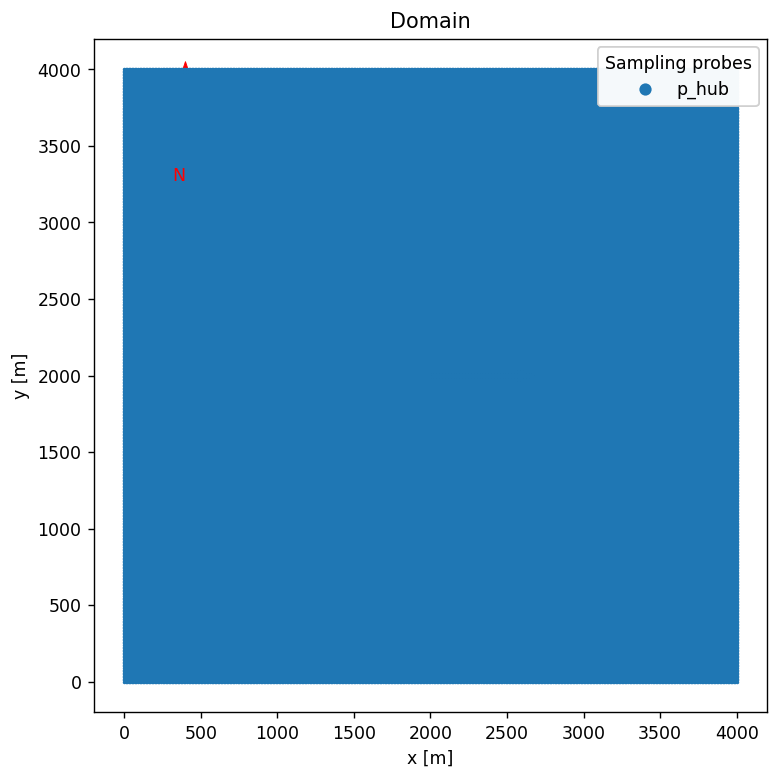

In [13]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['p_hub']
case.plotDomain(ax=ax)

In [14]:
check=case.validate()

-- Checking inputs --
[ PASS] max_level:           max_level = 0 >= 0
[ PASS] dt & CFL:            DT and CFL OK
[ PASS] Actuator physics:    incflo.physics and ICNS.source_terms OK for Actuators
[ SKIP] Actuator FST:        No Actuators
[ SKIP] Sampling probes:     Not active or no sampling planes

Results: 
 3 PASS
 2 SKIP
 0 FAIL
 0 WARN


In [15]:
# This will print out your mesh size & refinements
case.estimateMeshSize()

ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0     15360000             10.0 x 10.0 x 10.0
  TOTAL:     15360000


In [16]:
# Write the input file
print(case.writeAMRWindInput('AMRWind_precursor1.inp'))

# --- Simulation time control parameters ---
time.stop_time                           = 20000.0             # Max (simulated) time to evolve [s]
time.max_step                            = 40000               
time.fixed_dt                            = 0.5                 # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 4000                
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms                         = KsgsM84Src          
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol             